In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt


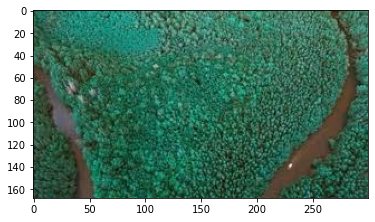

In [2]:
img = cv2.imread('C:/Users/dell/Downloads/forest4.jpg')
plt.imshow(img)
original_img =img
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.show()

In [3]:
print(img)
print(img.shape)

[[[ 79 106  55]
  [ 71  98  45]
  [ 60  84  26]
  ...
  [102 121  75]
  [ 90 110  61]
  [ 97 117  68]]

 [[ 67  94  43]
  [ 63  90  35]
  [ 75  99  41]
  ...
  [110 130  81]
  [104 124  75]
  [113 133  84]]

 [[ 67  94  41]
  [ 55  83  25]
  [ 87 111  51]
  ...
  [ 99 119  70]
  [ 99 119  70]
  [106 126  75]]

 ...

 [[ 59  75  38]
  [ 78  93  60]
  [ 51  64  44]
  ...
  [ 55  71  35]
  [ 57  74  38]
  [ 61  78  44]]

 [[ 60  76  40]
  [ 60  75  46]
  [ 31  44  24]
  ...
  [ 37  52  19]
  [ 41  58  26]
  [ 63  80  48]]

 [[ 56  71  38]
  [ 55  70  41]
  [ 33  46  28]
  ...
  [ 51  66  33]
  [ 58  74  45]
  [ 65  81  52]]]
(168, 300, 3)


In [4]:
# Flatten each channel of the image in a linear array
all_pixels = img.reshape((img.shape[0] * img.shape[1],3))
print(all_pixels.shape)

(50400, 3)


In [5]:
from sklearn.cluster import KMeans


In [6]:
dominant_colors = 4
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)


KMeans(n_clusters=4)

In [7]:
centers = km.cluster_centers_
centers =np.array(centers,dtype ='uint8')
print(centers)

[[ 56  73  75]
 [ 51  73  22]
 [117 138  73]
 [ 84 107  44]]


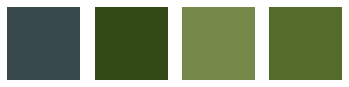

In [8]:
# Plot what all colors are these values ? 
i=1
colors =[]
for each_color in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    colors.append(each_color)
    # color swatch
    a = np.zeros((100,100,3), dtype ='uint8')
    a[:,:,:] = each_color
    plt.imshow(a)
plt.show()

# Segmenting Original Image

In [9]:
new_img = np.zeros((img.shape[0] * img.shape[1],3),dtype ='uint8')
print(new_img.shape)

(50400, 3)


In [10]:
a = km.labels_
print(len(a))
colors

50400


[array([56, 73, 75], dtype=uint8),
 array([51, 73, 22], dtype=uint8),
 array([117, 138,  73], dtype=uint8),
 array([ 84, 107,  44], dtype=uint8)]

In [11]:
for each_pixel in range(new_img.shape[0]):
    new_img[each_pixel] = colors[km.labels_[each_pixel]]

In [12]:
print(new_img)

[[ 84 107  44]
 [ 84 107  44]
 [ 51  73  22]
 ...
 [ 51  73  22]
 [ 51  73  22]
 [ 56  73  75]]


In [13]:
print(new_img.shape)

(50400, 3)


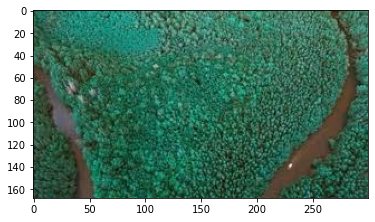

In [14]:
new_img = new_img.reshape((original_img.shape))
plt.imshow(original_img)
plt.show()

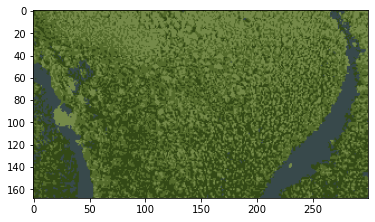

In [15]:
plt.imshow(new_img)
